In [480]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np


In [481]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [482]:
x_train.shape

(60000, 28, 28)

In [483]:
type(x_train)

numpy.ndarray

In [484]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

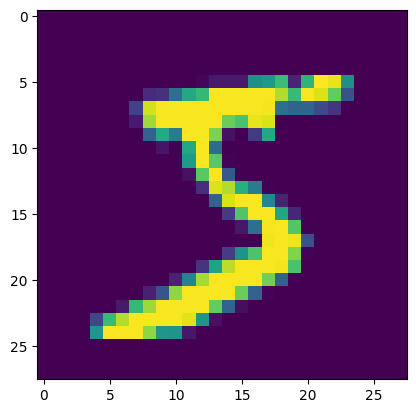

In [485]:
plt.imshow(x_train[0])

In [486]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

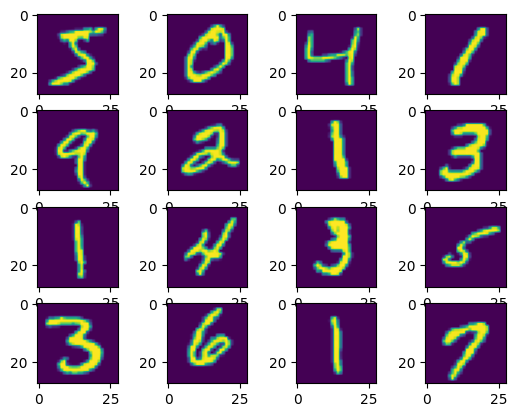

In [487]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
plt.show()

In [488]:
input_shape = (28, 28, 1)

In [489]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50),
      Dense(1)
      ] )

In [490]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [491]:
%%time

history = model_1.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 5.3095e-07 - accuracy: 0.1825
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.3095e-07 - accuracy: 0.1825
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.3095e-07 - accuracy: 0.1825
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.3095e-07 - accuracy: 0.1825
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.3095e-07 - accuracy: 0.1825
CPU times: total: 46.7 s
Wall time: 31.2 s


In [492]:
x_train = x_train / 255
x_test = x_test / 255

In [493]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [494]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50,activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [495]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [496]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3263 - accuracy: 0.9079
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1655 - accuracy: 0.9523
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1229 - accuracy: 0.9641
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0986 - accuracy: 0.9707
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0818 - accuracy: 0.9758
CPU times: total: 45.3 s
Wall time: 31.2 s


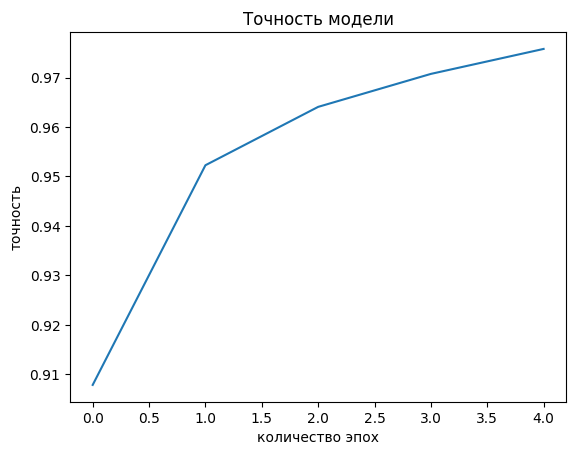

In [497]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

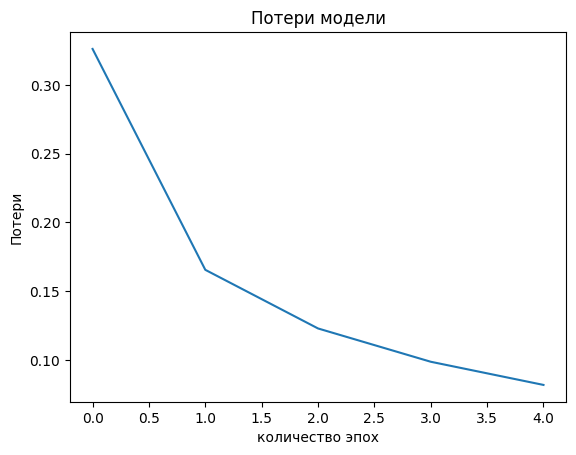

In [498]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [499]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.1097 - accuracy: 0.9662


[0.10970866680145264, 0.9661999940872192]

In [500]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0711 - accuracy: 0.9787 - val_loss: 0.1003 - val_accuracy: 0.9707
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0619 - accuracy: 0.9818 - val_loss: 0.1026 - val_accuracy: 0.9708
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.0982 - val_accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0498 - accuracy: 0.9850 - val_loss: 0.0973 - val_accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0448 - accuracy: 0.9866 - val_loss: 0.1063 - val_accuracy: 0.9697
CPU times: total: 50.7 s
Wall time: 33.9 s


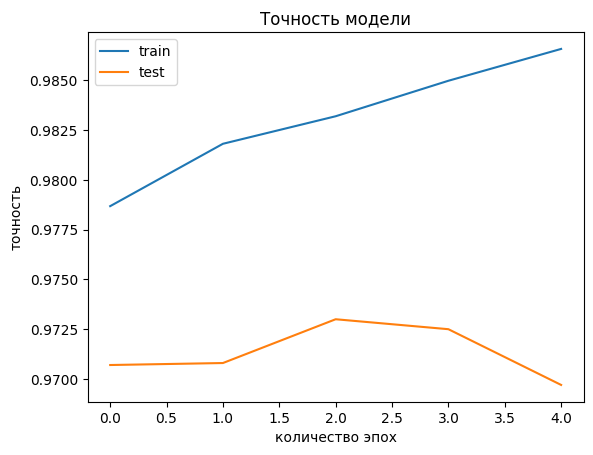

In [501]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


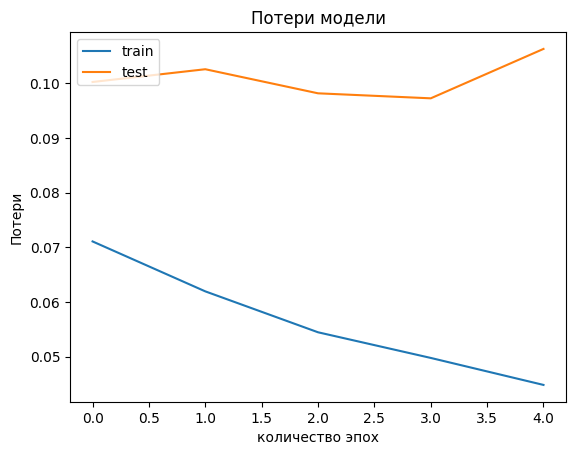

In [502]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [503]:
model = model_2

In [504]:
image = Image.open('2.jpg')
    # изменение рзмера изобржений на 28x28
tatras = Image.open("4.jpg")
tatras = tatras.resize((28, 28,))
grayscale = tatras.convert('L')
img = np.array(grayscale)
img = img.reshape(1, 28, 28)
img = img/255

In [505]:
res = model.predict([img])
np.argmax(res), max(res)[0]

1/1 [==============================] - 0s 189ms/step


(2, 5.3536125e-14)

In [506]:
y_train[2]

4